In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import os

In [19]:
df = pd.read_csv("mushrooms.csv")
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#EDA

In [410]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [411]:
df.isna().any().any()

False

In [412]:
df.shape

(8124, 23)

In [413]:
X = df.iloc[:,1:22]
Y = df.iloc[:,0]

In [414]:
X.shape, Y.shape

((8124, 21), (8124,))

In [415]:
X.columns, Y.name

(Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population'],
       dtype='object'), 'class')

In [416]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [417]:
import ydata_profiling as ydpf 

In [225]:
prof = ydpf.ProfileReport(df)

In [226]:
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Feature Engineering

Constant Value

In [20]:
df = df.drop(["veil-type"], axis=1)

Imbalance data

In [21]:
df = df.drop(["gill-attachment", "veil-color", "ring-number"], axis=1)

In [22]:
df.shape

(8124, 19)

In [23]:
X = df.iloc[:,1:22]
Y = df.iloc[:,0]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 18), (1625, 18), (6499,), (1625,))

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [28]:
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
X_train.shape, X_test.shape

((6499, 89), (1625, 89))

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [33]:
y_train.shape, y_test.shape

((6499,), (1625,))

#KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [35]:
vals = {}

In [36]:
for i in range(3,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  vals[i] = (accuracy_score(y_pred, y_test)*100)

In [37]:
max_key = sorted(vals, key=lambda x:vals[x], reverse=True)[0]
max_key, vals[max_key]

(3, 100.0)

#ANN

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout

In [280]:
model = Sequential()

In [281]:
model.add(Dense(84,"relu"))

In [282]:
model.add(Dense(64,"relu"))

In [283]:
model.add(Dense(48,"relu"))

In [284]:
model.add(Dense(48,"relu"))

In [285]:
model.add(Dense(1,"softmax"))

In [286]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [287]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [288]:
model_history = model.fit(X_train,y_train, batch_size=10, epochs=100, validation_split=0.3, callbacks=early_stopping)

Epoch 1/100
455/455 [==============================] - 4s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 2/100
455/455 [==============================] - 3s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 3/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 4/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 5/100
455/455 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 6/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2664 - val_loss: 0.0000e+00 - val_accuracy: 0.2518
Epoch 7/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accura

#CNN

In [458]:
pd.DataFrame(X_train[1]).shape

(89, 1)

In [459]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, Flatten

In [460]:
model = Sequential()

In [461]:
model.add(Conv1D(32, 5, activation="relu", input_shape=(89,1)))

In [462]:
model.add(MaxPool1D(5))

In [463]:
model.add(Dropout(0.25))

In [464]:
model.add(Conv1D(64, 5, activation="relu"))

In [465]:
model.add(MaxPool1D(5))

In [466]:
model.add(Dropout(0.25))

In [467]:
model.add(Flatten())

In [468]:
model.add(Dense(128, activation="relu"))

In [469]:
model.add(Dense(1, "softmax"))

In [470]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [471]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 85, 32)            192       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 17, 32)           0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 17, 32)            0         
                                                                 
 conv1d_21 (Conv1D)          (None, 13, 64)            10304     
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 2, 64)           

In [472]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [473]:
model_history = model.fit(pd.DataFrame(X_train),y_train, batch_size=10, epochs=100, validation_split=0.3, callbacks=early_stopping)

Epoch 1/100
455/455 [==============================] - 5s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 2/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 3/100
455/455 [==============================] - 3s 7ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 4/100
455/455 [==============================] - 3s 7ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 5/100
455/455 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 6/100
455/455 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4867 - val_loss: 0.0000e+00 - val_accuracy: 0.4821
Epoch 7/100
455/455 [==============================] - 3s 6ms/step - loss: 0.0000e+00 - accura

#Accuracy Checking 

In [161]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

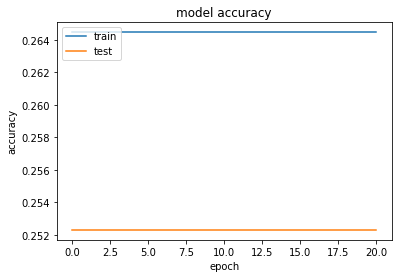

In [162]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

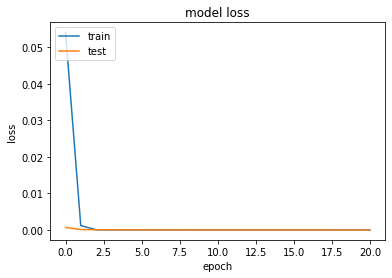

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

In [296]:
y_pred = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [164]:
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [165]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [166]:
print(score*100,"%")

27.384615384615387 %


In [167]:
print(y_test.head(10),"\n",y_pred[:10])

AttributeError: ignored

<AxesSubplot:>

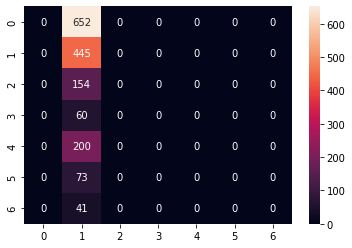

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='g')

###Saving the Model##

In [ ]:
model.save("model.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model('model.h5')

In [ ]:
z = loaded_model.predict([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0]])
z = z>=0.5
z

1/1 [==============================] - 0s 67ms/step


array([[False]])

In [ ]:
for i in pd.read_csv("mushrooms.csv").columns:
  print(i,":")
  print(pd.read_csv("mushrooms.csv")[i].unique())
  print("\n\n")

class :
['p' 'e']



cap-shape :
['x' 'b' 's' 'f' 'k' 'c']



cap-surface :
['s' 'y' 'f' 'g']



cap-color :
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']



bruises :
['t' 'f']



odor :
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']



gill-attachment :
['f' 'a']



gill-spacing :
['c' 'w']



gill-size :
['n' 'b']



gill-color :
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']



stalk-shape :
['e' 't']



stalk-root :
['e' 'c' 'b' 'r' '?']



stalk-surface-above-ring :
['s' 'f' 'k' 'y']



stalk-surface-below-ring :
['s' 'f' 'y' 'k']



stalk-color-above-ring :
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']



stalk-color-below-ring :
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']



veil-type :
['p']



veil-color :
['w' 'n' 'o' 'y']



ring-number :
['o' 't' 'n']



ring-type :
['p' 'e' 'l' 'f' 'n']



spore-print-color :
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']



population :
['s' 'n' 'a' 'v' 'y' 'c']



habitat :
['u' 'g' 'm' 'd' 'p' 'w' 'l']





In [ ]:
lst=[]
for i in pd.read_csv("mushrooms.csv").columns:
  lst.append(i)
  lst.append(pd.read_csv("mushrooms.csv")[i].unique())

In [ ]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [ ]:
data = Convert(lst)
data

{'class': array(['p', 'e'], dtype=object),
 'cap-shape': array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 'cap-surface': array(['s', 'y', 'f', 'g'], dtype=object),
 'cap-color': array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 'bruises': array(['t', 'f'], dtype=object),
 'odor': array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 'gill-attachment': array(['f', 'a'], dtype=object),
 'gill-spacing': array(['c', 'w'], dtype=object),
 'gill-size': array(['n', 'b'], dtype=object),
 'gill-color': array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 'stalk-shape': array(['e', 't'], dtype=object),
 'stalk-root': array(['e', 'c', 'b', 'r', '?'], dtype=object),
 'stalk-surface-above-ring': array(['s', 'f', 'k', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['s', 'f', 'y', 'k'], dtype=object),
 'stalk-color-above-ring': array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 'stalk-color-be

In [ ]:
j=0
for i in data.keys():
  if j==0:
    print(data[i])
  j+=1

['p' 'e']


In [ ]:
x=[]

j=0
for i in data.keys():
  if j==1:
    x = i
  j+=1

x, tuple(data[x])

('cap-shape', ('x', 'b', 's', 'f', 'k', 'c'))

In [ ]:
import pickle

In [ ]:
pickle.dump(data,open("dataset.pkl","wb"))

In [ ]:
pickle.dump(model,open("model.pkl","wb"))

In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("mushroom_model.tflite", "wb").write(tfmodel)

86124

#Saving the model

In [38]:
import pickle

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [515]:
pickle.dump(knn,open("mushroom_classifier_knn.pkl", "wb"))

In [43]:
pickle.dump(ohe,open("encoder.pkl", "wb"))

In [517]:
features = {}
for i  in df.columns:
  features[i] = pd.unique(df[i])

In [518]:
pickle.dump(features,open("features.pkl","wb"))